Dataset: https://www.kaggle.com/datasets/rahuldogra/top5000youtubechannels

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('8 - Youtube Channels.csv')

6. Data Cleaning  (Replace '--'  to NaN)

In [3]:
import numpy as np

In [4]:
data.replace('--',np.nan,regex=True,inplace=True)

7. Check Null Values In The Dataset

In [5]:
data.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

8. Data Cleaning [ Rank Column ]

In [6]:
data.dtypes
#remove -st, -nd, -th
#remove comma
#convert object to int 

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [7]:
data['Rank'] = data['Rank'].str[0:-2]

In [8]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433


In [9]:
data['Rank'] = data['Rank'] .str.replace(',','')

In [10]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [11]:
data['Rank'] = data['Rank'].astype('int')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   int32 
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  4994 non-null   object
 4   Subscribers    4613 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 215.0+ KB


9. Data Cleaning [ Video Uploads & Subscribers ]

In [13]:
data['Video Uploads'] = data['Video Uploads'].fillna(0).astype(int)

In [14]:
data['Subscribers'] = data['Subscribers'].fillna(0).astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   int32 
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   int32 
 4   Subscribers    5000 non-null   int32 
 5   Video views    5000 non-null   int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 175.9+ KB


10. Data Cleaning [ Grade Column ]

In [16]:
data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', '\xa0 ', 'A- ', 'B+ '], dtype=object)

In [17]:
data['Grade']=data['Grade'].map({'A++ ':5, 'A+ ':4, '\xa0 ':3, 'A- ':2, 'B+ ':1})

In [18]:
data.dtypes

Rank               int32
Grade            float64
Channel name      object
Video Uploads      int32
Subscribers        int32
Video views        int64
dtype: object

11. Find Average Views For Each Channel

In [19]:
data ['avg_views'] = data['Video views']/data['Video Uploads']

In [20]:
pd.options.display.float_format = '{:.2f}'.format

In [21]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg_views
0,1,5.00,Zee TV,82757,18752951,20869786591,252181.53
1,2,5.00,T-Series,12661,61196302,47548839843,3755535.89
2,3,5.00,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5.00,SET India,27323,31180559,22675948293,829921.62
4,5,5.00,WWE,36756,32852346,26273668433,714813.05


12. Find Out Top Five Channels With Maximum Number of Video Uploads

In [22]:
data.sort_values(by='Video Uploads',ascending=False).head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg_views
3453,3454,1.00,AP Archive,422326,746325,548619569,1299.04
1149,1150,2.00,YTN NEWS,355996,820108,1640347646,4607.77
2223,2224,1.00,SBS Drama,335521,1418619,1565758044,4666.65
323,324,NaN,GMA News,269065,2599175,2786949164,10357.90
2956,2957,1.00,MLB,267649,1434206,1329206392,4966.23


13. Find Correlation Matrix

In [24]:
numeric_data = data.select_dtypes(include=[np.number])

In [25]:
numeric_data.corr()

,Rank,Grade,Video Uploads,Subscribers,Video views,avg_views
Rank,1.00,-0.74,-0.07,-0.36,-0.39,-0.15
Grade,-0.74,1.00,0.10,0.39,0.48,0.09
Video Uploads,-0.07,0.10,1.00,0.02,0.09,-0.06
Subscribers,-0.36,0.39,0.02,1.00,0.79,0.29
Video views,-0.39,0.48,0.09,0.79,1.00,0.30
avg_views,-0.15,0.09,-0.06,0.29,0.30,1.00


14.  Which Grade Has A Maximum Number of Video Uploads?

In [26]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'avg_views'],
      dtype='object')

<Axes: xlabel='Grade', ylabel='Video Uploads'>

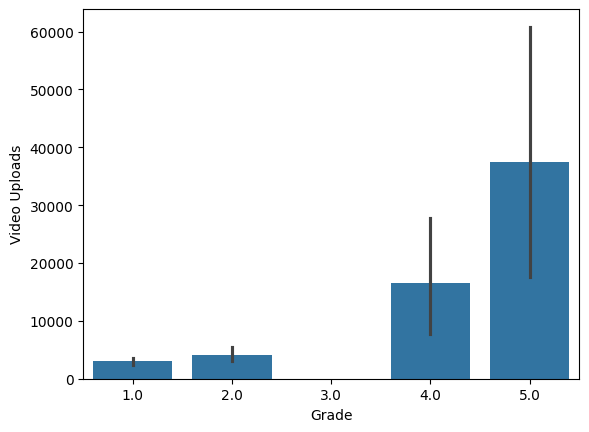

In [32]:
sns.barplot(x='Grade', y='Video Uploads', data=data)

15. Which Grade Has The Highest Average Views?

<Axes: xlabel='Grade', ylabel='avg_views'>

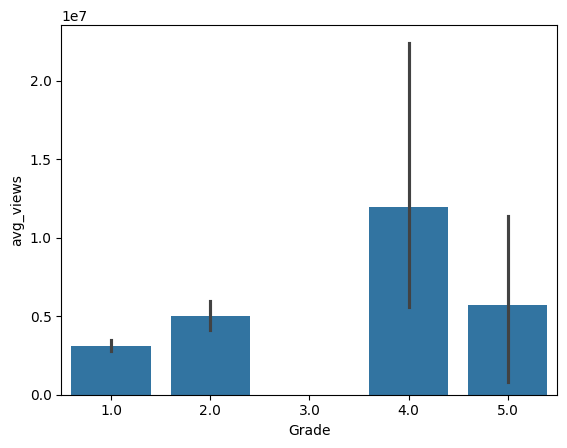

In [33]:
sns.barplot(x='Grade', y='avg_views', data=data)

16.  Which Grade Has The Highest Number of Subscribers? 

<Axes: xlabel='Grade', ylabel='Subscribers'>

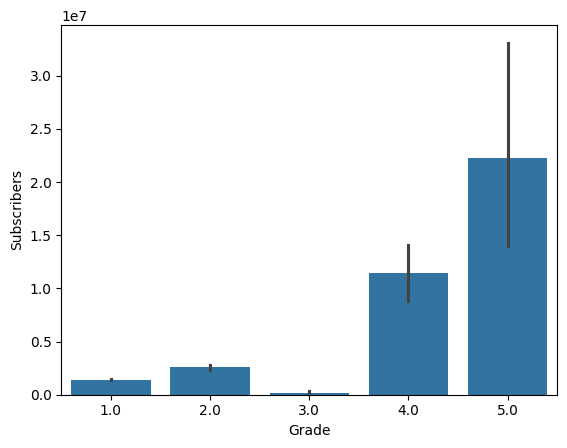

In [34]:
sns.barplot(x='Grade', y='Subscribers', data=data)

17. Which Grade Has The Highest Video Views? 

<Axes: xlabel='Grade', ylabel='Video views'>

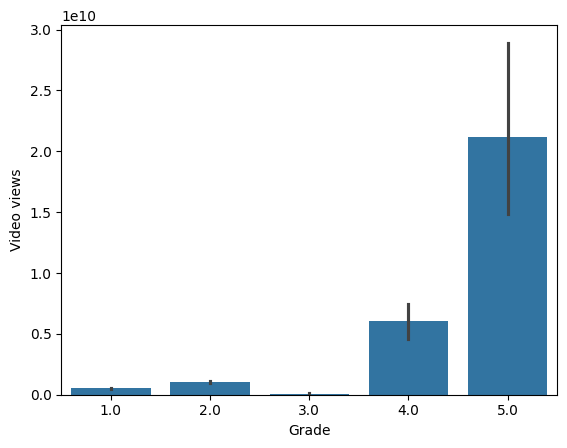

In [35]:
sns.barplot(x='Grade', y='Video views', data=data)

In [38]:
numeric_data.groupby(by='Grade').mean()

,Rank,Video Uploads,Subscribers,Video views,avg_views
Grade,,,,,
1.00,3520.68,2985.99,1413679.31,526521651.34,3126307.34
2.00,1528.50,4136.51,2571687.18,1041149249.38,4991301.81
3.00,2388.33,0.00,139764.50,99120051.17,inf
4.00,31.00,16547.93,11440924.37,6053120621.05,11951994.86
5.00,5.50,37450.70,22281762.50,21199091192.80,5688267.96
